In [1]:
import pandas as pd, numpy as np

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452583 entries, 0 to 452582
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     452583 non-null  int64  
 1   user           452583 non-null  object 
 2   date           452583 non-null  object 
 3   content        452583 non-null  object 
 4   user_location  307280 non-null  object 
 5   tweets         452554 non-null  object 
 6   Positive       452583 non-null  float64
 7   Negative       452583 non-null  float64
 8   Neutral        452583 non-null  float64
 9   Status         452583 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 34.5+ MB


In [4]:
df.drop(columns=['Unnamed: 0','tweets','Positive','Negative','Neutral','Status'],inplace=True)

In [22]:
data=df.copy()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452583 entries, 0 to 452582
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user           452583 non-null  object
 1   date           452583 non-null  object
 2   content        452583 non-null  object
 3   user_location  307280 non-null  object
dtypes: object(4)
memory usage: 13.8+ MB


In [16]:
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [26]:
df.rename(columns={'content':'Tweets'},inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452583 entries, 0 to 452582
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user           452583 non-null  object
 1   date           452583 non-null  object
 2   Tweets         452583 non-null  object
 3   user_location  307280 non-null  object
dtypes: object(4)
memory usage: 13.8+ MB


In [28]:
nltk.download('stopwords')
#stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'\n','',text)
    text=re.sub(r'RT[\s]+','',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('hxxps?://\S+|www\.\S+', '', text)
    text = re.sub('godaddy', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    #text = [stemmer.stem(word) for word in text.split(' ')]
    #text=" ".join(text)
    return text
df["tweets"] = df["Tweets"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
df

,user,date,Tweets,user_location,tweets
0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07 23:58:19+00:00,@GoDaddy go to hell Bob Parsons you spineless ...,Riviera Maya / CDMX ???ý???« ????,go hell bob parsons spineless fuck stop cowar...
1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07 23:57:11+00:00,@hullboydan Thanks. Now how do I fire GoDaddy?,NaN,thanks fire
2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA",proudly presenting check let know think none ...
3,"{'username': 'GirlsinTech', 'id': 16014840, 'd...",2019-01-07 23:52:07+00:00,So you want to be your own boss? You don??t n...,Global,want boss dont need go biz school entrepreneu...
4,"{'username': 'mark_callwood', 'id': 9057451792...",2019-01-07 23:46:48+00:00,For every cunty elephant killing #GoDaddy Bob ...,Surrey,every cunty elephant killing bob parsons hund...
...,...,...,...,...,...
452578,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:50:33+00:00,Possible threat on hxxps://rediction-carte-vit...,"Roma, Lazio",possible threat phishing
452579,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:55:09+00:00,Possible threat on hxxp://shivbets[.]com #god...,"Roma, Lazio",possible threat
452580,"{'username': 'hytyjyu', 'id': 1551087273160036...",2022-09-23 08:02:29+00:00,@tsa_gamefi @MetascanPro @JoshMalina @whoisadd...,NaN,gamefi
452581,"{'username': 'ARCH1V3S23', 'id': 1498900982209...",2022-09-23 08:04:14+00:00,adobe express why do u nawt hv a layer somethi...,"she/they, minor, works on â¡ï¸",adobe express u nawt hv layer something like c...


In [30]:
#Create a function to get the Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [31]:
#Create a function to get the Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [32]:
#Create two new columns
df['Subjectivity']=df['tweets'].apply(getSubjectivity)
df['Polarity']=df['tweets'].apply(getPolarity)

df

,user,date,Tweets,user_location,tweets,Subjectivity,Polarity
0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07 23:58:19+00:00,@GoDaddy go to hell Bob Parsons you spineless ...,Riviera Maya / CDMX ???ý???« ????,go hell bob parsons spineless fuck stop cowar...,0.6,-0.4
1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07 23:57:11+00:00,@hullboydan Thanks. Now how do I fire GoDaddy?,NaN,thanks fire,0.2,0.2
2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA",proudly presenting check let know think none ...,1.0,0.8
3,"{'username': 'GirlsinTech', 'id': 16014840, 'd...",2019-01-07 23:52:07+00:00,So you want to be your own boss? You don??t n...,Global,want boss dont need go biz school entrepreneu...,0.0,0.0
4,"{'username': 'mark_callwood', 'id': 9057451792...",2019-01-07 23:46:48+00:00,For every cunty elephant killing #GoDaddy Bob ...,Surrey,every cunty elephant killing bob parsons hund...,0.9,0.4
...,...,...,...,...,...,...,...
452578,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:50:33+00:00,Possible threat on hxxps://rediction-carte-vit...,"Roma, Lazio",possible threat phishing,1.0,0.0
452579,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:55:09+00:00,Possible threat on hxxp://shivbets[.]com #god...,"Roma, Lazio",possible threat,1.0,0.0
452580,"{'username': 'hytyjyu', 'id': 1551087273160036...",2022-09-23 08:02:29+00:00,@tsa_gamefi @MetascanPro @JoshMalina @whoisadd...,NaN,gamefi,0.0,0.0
452581,"{'username': 'ARCH1V3S23', 'id': 1498900982209...",2022-09-23 08:04:14+00:00,adobe express why do u nawt hv a layer somethi...,"she/they, minor, works on â¡ï¸",adobe express u nawt hv layer something like c...,0.0,0.0


In [37]:
df[df['Polarity']>0.0].shape[0]/df.shape[0]

0.44669154608105033

In [28]:
df[df['Polarity']>0.0]

,user,date,Tweets,user_location,tweets,Subjectivity,Polarity
2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA",proud present check let know think none goce...,0.500000,0.400000
5,"{'username': 'MccrelessTravis', 'id': 10715028...",2019-01-07 23:44:10+00:00,Proudly presenting https://t.co/EeTt0jt3B4. Ch...,"Mackinaw city, michigan",proud present check let know think gocentr via,0.500000,0.400000
6,"{'username': 'joeczucha', 'id': 21409392, 'dis...",2019-01-07 23:43:23+00:00,@iamjeffperry @DanielCBerman @RosemaryOrchard ...,NaN,taken webfact theyr creat us account ...,0.502273,0.243182
10,"{'username': 'ACELTICEYE', 'id': 1082385715571...",2019-01-07 23:28:42+00:00,Proudly presenting https://t.co/1pIZlWJOvC. Ch...,USA,proud present check let know think none goce...,0.500000,0.400000
11,"{'username': 'ItsikRomano', 'id': 57819532, 'd...",2019-01-07 23:26:54+00:00,Does @GoDaddy sell your contact info to spamme...,Montreal - Quebec - Canada,sell contact info spammer india sinc purchas ...,0.333333,0.250000
...,...,...,...,...,...,...,...
452567,"{'username': 'baptistaresearc', 'id': 96367719...",2022-09-23 06:10:00+00:00,Check out our latest report on - GoDaddy Inc $...,NaN,check latest report inc gddi economi stock ...,0.900000,0.500000
452569,"{'username': 'frequencyfixx', 'id': 4066248553...",2022-09-23 06:20:04+00:00,Don't miss a beat! Get the latest updates and ...,"West Hollywood, CA",dont miss beat get latest updat subscrib ema...,0.900000,0.500000
452570,"{'username': 'KeriKelsey', 'id': 192494099, 'd...",2022-09-23 06:23:53+00:00,@GoDaddy So disappointed youâre more interes...,NaN,disappoint youâr interest get new custom ke...,0.218182,0.078788
452571,"{'username': 'africangrillbar', 'id': 13153658...",2022-09-23 06:39:15+00:00,Proudly presenting https://t.co/cUupZMQHIE. Ch...,Lakewood & green valley Ranch,proud present check let know think websitebu...,0.500000,0.400000


In [38]:
#Create a function to compute the negative, positive and neutral analysis

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Status']=df['Polarity'].apply(getAnalysis)

df

,user,date,Tweets,user_location,tweets,Subjectivity,Polarity,Status
0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07 23:58:19+00:00,@GoDaddy go to hell Bob Parsons you spineless ...,Riviera Maya / CDMX ???ý???« ????,go hell bob parsons spineless fuck stop cowar...,0.6,-0.4,Negative
1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07 23:57:11+00:00,@hullboydan Thanks. Now how do I fire GoDaddy?,NaN,thanks fire,0.2,0.2,Positive
2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA",proudly presenting check let know think none ...,1.0,0.8,Positive
3,"{'username': 'GirlsinTech', 'id': 16014840, 'd...",2019-01-07 23:52:07+00:00,So you want to be your own boss? You don??t n...,Global,want boss dont need go biz school entrepreneu...,0.0,0.0,Neutral
4,"{'username': 'mark_callwood', 'id': 9057451792...",2019-01-07 23:46:48+00:00,For every cunty elephant killing #GoDaddy Bob ...,Surrey,every cunty elephant killing bob parsons hund...,0.9,0.4,Positive
...,...,...,...,...,...,...,...,...
452578,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:50:33+00:00,Possible threat on hxxps://rediction-carte-vit...,"Roma, Lazio",possible threat phishing,1.0,0.0,Neutral
452579,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:55:09+00:00,Possible threat on hxxp://shivbets[.]com #god...,"Roma, Lazio",possible threat,1.0,0.0,Neutral
452580,"{'username': 'hytyjyu', 'id': 1551087273160036...",2022-09-23 08:02:29+00:00,@tsa_gamefi @MetascanPro @JoshMalina @whoisadd...,NaN,gamefi,0.0,0.0,Neutral
452581,"{'username': 'ARCH1V3S23', 'id': 1498900982209...",2022-09-23 08:04:14+00:00,adobe express why do u nawt hv a layer somethi...,"she/they, minor, works on â¡ï¸",adobe express u nawt hv layer something like c...,0.0,0.0,Neutral


In [40]:
data=df.copy()

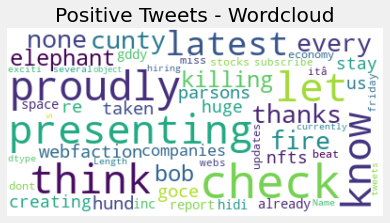

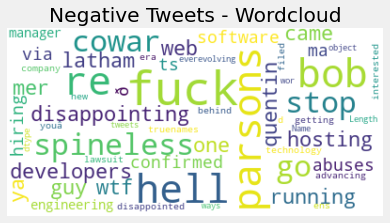

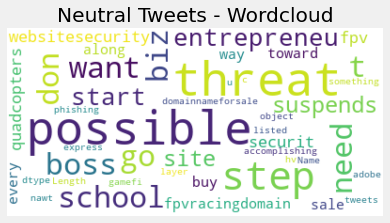

In [41]:
# let's create some wordclouds to see which words are the most used for each sentiment:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive tweets
positive_tweets = data['tweets'][data["Status"] == 'Positive']
stop_words = ["https", "co", "RT","user","@user"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative tweets
negative_tweets = data['tweets'][data["Status"] == 'Negative']
stop_words = ["https", "co", "RT","user","@user"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with neutral tweets
neutral_tweets = data['tweets'][data["Status"] == 'Neutral']
stop_words = ["https", "co", "RT","user","@user"] + list(STOPWORDS)
neutral_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(neutral_tweets))
plt.figure()
plt.title("Neutral Tweets - Wordcloud")
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [65]:
df['Status'].value_counts(normalize=True)*100

Neutral     46.105134
Positive    44.669155
Negative     9.225711
Name: Status, dtype: float64

In [52]:
df[['Tweets','tweets']][df['Status']=='Negative'].head(80)

,Tweets,tweets
0,@GoDaddy go to hell Bob Parsons you spineless ...,go hell bob parsons spineless fuck stop cowar...
7,@bergus @webfaction @GoDaddy Very disappointin...,disappointing web hosting developers mer...
8,"Wtf @webfaction, I came to you running from go...",wtf came running
15,@GoDaddy @GoDaddyHelp @godaddyauctions Fuck al...,fuck ya
21,@hullboydan To Hell with Bob Parsons. Fuck thi...,hell bob parsons fuck guy
...,...,...
555,@GoDaddy founder done fucked up. Prepare for t...,founder done fucked prepare layoffs done piss...
562,Consider me gone! This is never acceptable nor...,consider gone never acceptable manly spineless...
576,Bob Parsons of GoDaddy: Shame on you!! #Boycot...,bob parsons shame boycott hope goes broke ppl...
585,Disgusting! @GoDaddy OUT! AND AWAY. https://t....,disgusting away


In [50]:
df[['Tweets','tweets']][df['Status']=='Positive'].head(30)

,Tweets,tweets
1,@hullboydan Thanks. Now how do I fire GoDaddy?,thanks fire
2,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,proudly presenting check let know think none ...
4,For every cunty elephant killing #GoDaddy Bob ...,every cunty elephant killing bob parsons hund...
5,Proudly presenting https://t.co/EeTt0jt3B4. Ch...,proudly presenting check let know think goce...
6,@iamjeffperry @DanielCBerman @RosemaryOrchard ...,taken webfaction theyre creating us a...
10,Proudly presenting https://t.co/1pIZlWJOvC. Ch...,proudly presenting check let know think none ...
11,Does @GoDaddy sell your contact info to spamme...,sell contact info spammers india since purcha...
14,Refer A Friend And Get A Free Lesson! https:/...,refer friend get free lesson via
16,Proudly presenting https://t.co/7mnaYgdR9J. Ch...,proudly presenting check let know think via
17,@dtcav @DesignationSix @GoDaddy Follow who Des...,follow designation says sponsor fox tweet ...


In [53]:
df[['Tweets','tweets']][df['Status']=='Neutral'].head(80)

,Tweets,tweets
3,So you want to be your own boss? You don??t n...,want boss dont need go biz school entrepreneu...
9,Where to Start When GoDaddy Suspends Your Site...,start suspends site websitesecurity securit...
12,https://t.co/OoOHJEZxtz \n\n#fpv #quadcopters ...,fpv quadcopters fpvracingdomain sale buy
13,Every step along the way is a step toward acco...,every step along way step toward accomplishing...
20,https://t.co/6EFVVSVc6v . . . #DomainNameForSa...,domainnameforsale listed
...,...,...
148,@hullboydan He resigned from GoDaddy in Octobe...,resigned october
149,Bye bye #webhosting #scottwagner #GoDaddy #ele...,bye bye webhosting scottwagner elephants doma...
150,@leilaclaire @FeministaJones @GoDaddy @faceboo...,saw 
151,@kimberlynr @hullboydan I will not give GoDadd...,give penny money


In [59]:
df.iloc[182,:]

user             {'username': 'IsServiceDownAU', 'id': 86676070...
date                                     2019-01-07 18:05:32+00:00
Tweets           ??? GoDaddy is having issues since 04:30 AM...
user_location                                            Australia
tweets                     issues since  aest   rt also issues 
Subjectivity                                                   0.0
Polarity                                                       0.0
Status                                                     Neutral
Name: 182, dtype: object

In [61]:
df1=df.copy()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452583 entries, 0 to 452582
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user           452583 non-null  object 
 1   date           452583 non-null  object 
 2   Tweets         452583 non-null  object 
 3   user_location  307280 non-null  object 
 4   tweets         452583 non-null  object 
 5   Subjectivity   452583 non-null  float64
 6   Polarity       452583 non-null  float64
 7   Status         452583 non-null  object 
dtypes: float64(2), object(6)
memory usage: 27.6+ MB


In [63]:
df1.rename(columns={'tweets':'Clean_tweets'},inplace=True)

In [64]:
df1.to_csv('df1.csv')

In [67]:
sentiment_counts = df.groupby(['Status']).size()
print(sentiment_counts)

Status
Negative     41754
Neutral     208664
Positive    202165
dtype: int64


<AxesSubplot:>

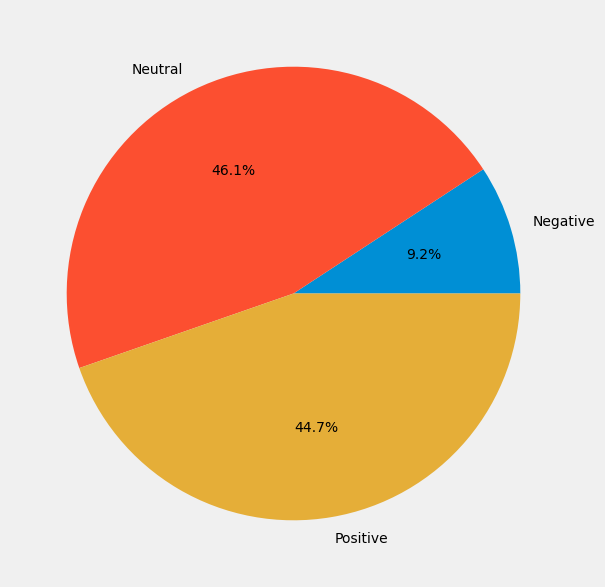

In [68]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

In [69]:
import collections

In [77]:
tweet_words_list=[]
for i in neutral_tweets:
    a=i.split()
    tweet_words_list.extend(a)

In [78]:
len(tweet_words_list)

1656757

In [72]:
#For Positive Words
filtered_words_spam = [word for word in tweet_words_list if word not in stop_words]
counted_words_spam = collections.Counter(filtered_words_spam)

word_count_spam = {}

for letter, count in counted_words_spam.most_common(50):
    word_count_spam[letter] = count
    
for i,j in word_count_spam.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: via, count: 69366
Word: check, count: 62506
Word: know, count: 62170
Word: think, count: 60373
Word: let, count: 59068
Word: presenting, count: 58427
Word: proudly, count: 58248
Word: website, count: 46743
Word: builder, count: 25114
Word: domain, count: 24451
Word: websitebuilder, count: 18799
Word: new, count: 15854
Word: gocentral, count: 13334
Word: great, count: 12705
Word: hosting, count: 11656
Word: none, count: 11616
Word: site, count: 10584
Word: domains, count: 9524
Word: love, count: 8817
Word: business, count: 8636
Word: email, count: 8474
Word: job, count: 8034
Word: name, count: 8012
Word: thanks, count: 7714
Word: help, count: 7696
Word: free, count: 7621
Word: amp, count: 7561
Word: web, count: 7315
Word: best, count: 7082
Word: good, count: 7070
Word: dont, count: 6489
Word: marketing, count: 6221
Word: support, count: 6161
Word: wordpress, count: 6101
Word: one, count: 5874
Word: use, count: 5691
Word: latest, count: 5474
Word: updates, count: 5330
Word: us, cou

In [76]:
#For Negative Words
filtered_words_spam = [word for word in tweet_words_list if word not in stop_words]
counted_words_spam = collections.Counter(filtered_words_spam)

word_count_spam = {}

for letter, count in counted_words_spam.most_common(50):
    word_count_spam[letter] = count
    
for i,j in word_count_spam.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: domain, count: 6236
Word: website, count: 4481
Word: support, count: 3454
Word: hosting, count: 3380
Word: service, count: 3291
Word: customer, count: 2843
Word: email, count: 2837
Word: site, count: 2811
Word: domains, count: 2505
Word: time, count: 2504
Word: business, count: 2503
Word: one, count: 2479
Word: help, count: 2452
Word: amp, count: 2235
Word: company, count: 2177
Word: small, count: 2068
Word: dont, count: 1969
Word: use, count: 1958
Word: bad, count: 1861
Word: worst, count: 1854
Word: im, count: 1796
Word: know, count: 1761
Word: via, count: 1711
Word: name, count: 1695
Word: still, count: 1619
Word: people, count: 1616
Word: even, count: 1543
Word: need, count: 1498
Word: new, count: 1494
Word: web, count: 1479
Word: account, count: 1478
Word: go, count: 1446
Word: us, count: 1356
Word: please, count: 1355
Word: want, count: 1344
Word: wordpress, count: 1329
Word: never, count: 1318
Word: back, count: 1285
Word: years, count: 1282
Word: days, count: 1231
Word: r

In [79]:
#For Neutral Words
filtered_words_spam = [word for word in tweet_words_list if word not in stop_words]
counted_words_spam = collections.Counter(filtered_words_spam)

word_count_spam = {}

for letter, count in counted_words_spam.most_common(50):
    word_count_spam[letter] = count
    
for i,j in word_count_spam.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: domain, count: 22639
Word: posted, count: 21036
Word: de, count: 18851
Word: via, count: 17736
Word: website, count: 13948
Word: que, count: 12851
Word: domains, count: 9232
Word: threat, count: 8899
Word: ø¬ùø¯ø§ø¯ù, count: 8797
Word: hosting, count: 8594
Word: ø§ø³øªø¶ø§ùø©, count: 8348
Word: un, count: 8006
Word: web, count: 7937
Word: wordpress, count: 7451
Word: con, count: 7410
Word: en, count: 7061
Word: possible, count: 6920
Word: check, count: 6407
Word: name, count: 6347
Word: lo, count: 5995
Word: phishing, count: 5865
Word: site, count: 5706
Word: ø§ùù, count: 4713
Word: business, count: 4621
Word: vistazo, count: 4598
Word: opinas, count: 4582
Word: dinos, count: 4573
Word: â¡echa, count: 4561
Word: orgullo, count: 4498
Word: ø´ø±ø­, count: 4483
Word: ø´ø±ø§ø¡, count: 4305
Word: ùø§ùø¹, count: 4258
Word: la, count: 4222
Word: sale, count: 4158
Word: amp, count: 3993
Word: email, count: 3822
Word: el, count: 3713
Word: help, count: 3697
Word: domainnames, count:

### Creation of Extra columns to specify 0/1 status of Service Related Keywords

In [94]:
def zero_one(word,search):
    if word.find(search)==-1:
        return 0
    else:
        return 1

In [95]:
df['builder']=df['tweets'].apply(lambda x: zero_one(x,'builder'))

In [96]:
df['website']=df['tweets'].apply(lambda x: zero_one(x,'website'))

In [104]:
df['hosting']=df['tweets'].apply(lambda x: zero_one(x,'hosting'))

In [106]:
df['software']=df['tweets'].apply(lambda x: zero_one(x,'software'))

In [107]:
df['websitesecurity']=df['tweets'].apply(lambda x: zero_one(x,'websitesecurity'))

In [108]:
df['security']=df['tweets'].apply(lambda x: zero_one(x,'security'))

In [109]:
df['page']=df['tweets'].apply(lambda x: zero_one(x,'page'))

In [110]:
df['web']=df['tweets'].apply(lambda x: zero_one(x,'web'))

In [111]:
df['domain']=df['tweets'].apply(lambda x: zero_one(x,'domain'))

In [112]:
df['email']=df['tweets'].apply(lambda x: zero_one(x,'email'))

In [113]:
df['wordpress']=df['tweets'].apply(lambda x: zero_one(x,'wordpress'))

In [114]:
df['phishing']=df['tweets'].apply(lambda x: zero_one(x,'phishing'))

In [115]:
df['support']=df['tweets'].apply(lambda x: zero_one(x,'support'))

In [116]:
df['site']=df['tweets'].apply(lambda x: zero_one(x,'site'))

In [117]:
df['domain']=df['tweets'].apply(lambda x: zero_one(x,'domain'))

In [118]:
df['service']=df['tweets'].apply(lambda x: zero_one(x,'service'))

In [119]:
df['subscribe']=df['tweets'].apply(lambda x: zero_one(x,'subscribe'))

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452583 entries, 0 to 452582
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user             452583 non-null  object 
 1   date             452583 non-null  object 
 2   Tweets           452583 non-null  object 
 3   user_location    307280 non-null  object 
 4   tweets           452583 non-null  object 
 5   Subjectivity     452583 non-null  float64
 6   Polarity         452583 non-null  float64
 7   Status           452583 non-null  object 
 8   builder          452583 non-null  int64  
 9   website          452583 non-null  int64  
 10  hosting          452583 non-null  int64  
 11  software         452583 non-null  int64  
 12  websitesecurity  452583 non-null  int64  
 13  security         452583 non-null  int64  
 14  page             452583 non-null  int64  
 15  web              452583 non-null  int64  
 16  domain           452583 non-null  int6

In [ ]:
#Sentiment Analysis of Tweets containing these keywords taken seperately

Status
Negative     41754
Neutral     208664
Positive    202165
dtype: int64


<AxesSubplot:>

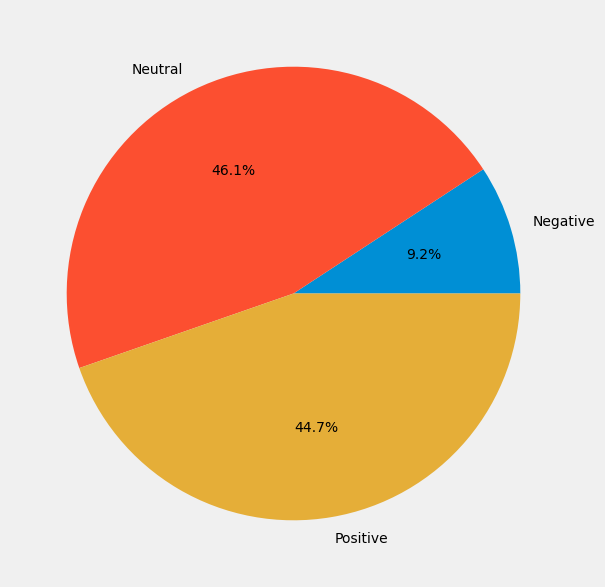

In [133]:
sentiment_counts = df.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

In [128]:
df['security'].value_counts()

0    446738
1      5845
Name: security, dtype: int64

In [98]:
df['builder'].value_counts()

0    403996
1     48587
Name: builder, dtype: int64

In [97]:
df['website'].value_counts()

0    364151
1     88432
Name: website, dtype: int64

In [103]:
df.iloc[1008,:]

user             {'username': 'frog_leaping', 'id': 10508497073...
date                                     2019-01-06 18:21:01+00:00
Tweets           My answer to Can we do SEO for websites that a...
user_location                                 Uttar Pradesh, India
tweets              answer seo websites made  wix website builder 
Subjectivity                                                   0.0
Polarity                                                       0.0
Status                                                     Neutral
builder                                                          1
website                                                          1
Name: 1008, dtype: object

## Seperate Dataframes containing tweets containing each Keyword

In [138]:
df_builder=df[df['builder']==1]

In [140]:
df_website=df[df['website']==1]
df_hosting=df[df['hosting']==1]
df_software=df[df['software']==1]
df_websitesecurity=df[df['websitesecurity']==1]
df_security=df[df['security']==1]
df_page=df[df['page']==1]
df_web=df[df['web']==1]
df_domain=df[df['domain']==1]
df_email=df[df['email']==1]
df_wordpress=df[df['wordpress']==1]
df_phishing=df[df['phishing']==1]
df_support=df[df['support']==1]
df_site=df[df['site']==1]
df_service=df[df['service']==1]
df_subscribe=df[df['subscribe']==1]

## Sentiment Analysis plot for Each Keyword

Status
Negative      388
Neutral      4062
Positive    44137
dtype: int64


<AxesSubplot:>

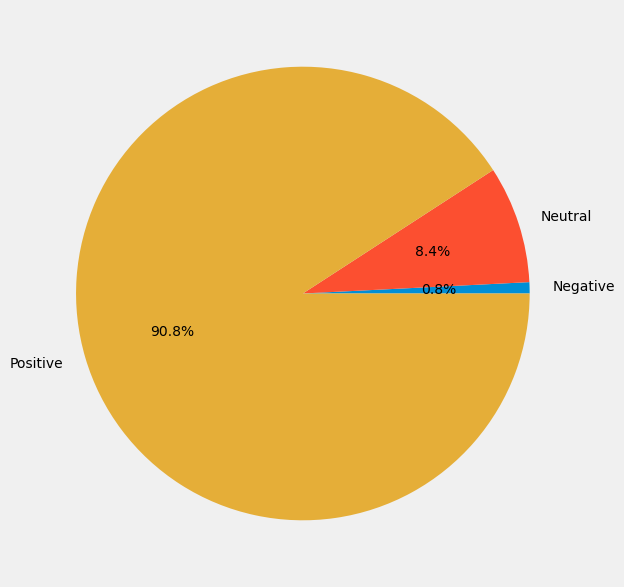

In [142]:
#builder
sentiment_counts = df_builder.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative     4918
Neutral     17694
Positive    65820
dtype: int64


<AxesSubplot:>

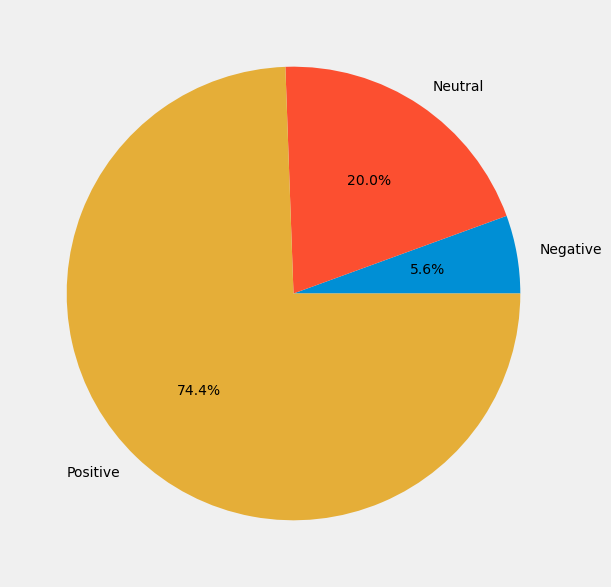

In [143]:
#website
sentiment_counts = df_website.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative     3279
Neutral      9137
Positive    10143
dtype: int64


<AxesSubplot:>

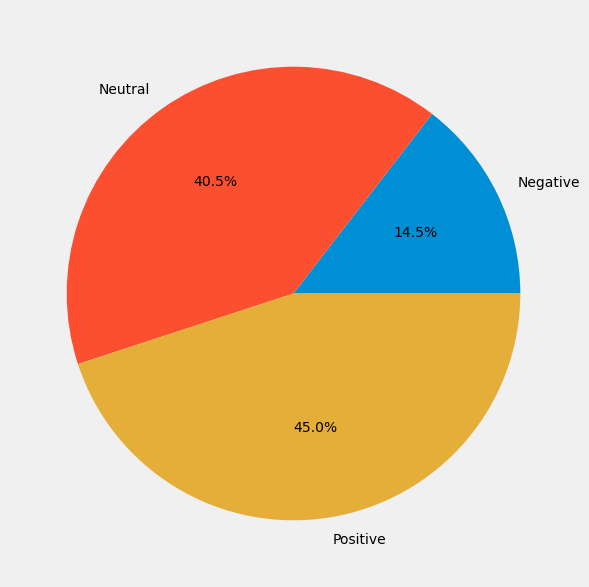

In [144]:
#hosting
sentiment_counts = df_hosting.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative    244
Neutral     706
Positive    531
dtype: int64


<AxesSubplot:>

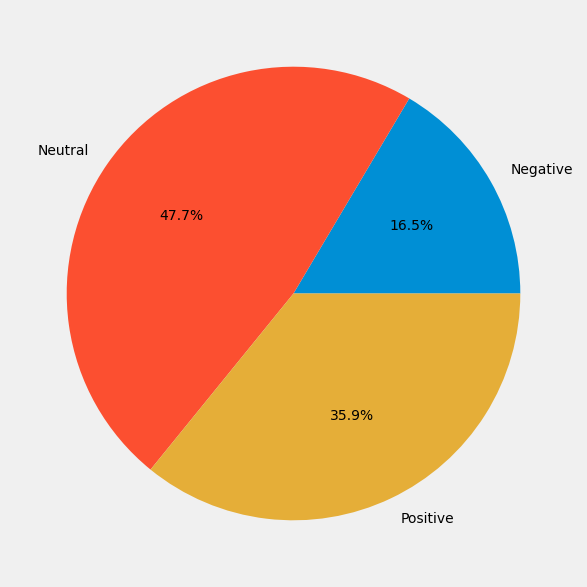

In [145]:
#software
sentiment_counts = df_software.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative     953
Neutral     3032
Positive    1860
dtype: int64


<AxesSubplot:>

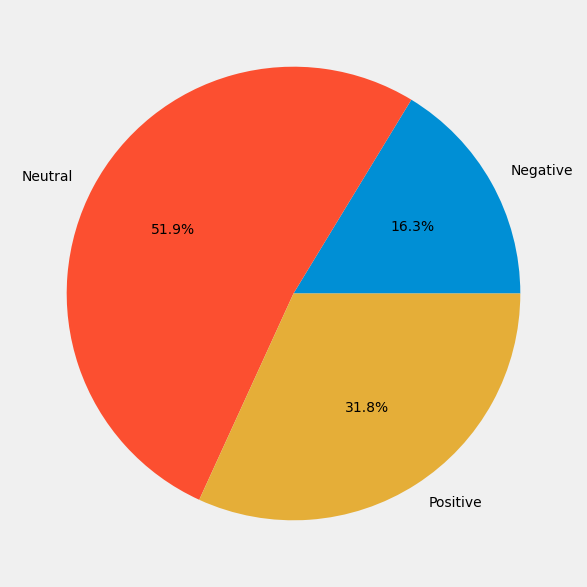

In [147]:
#security
sentiment_counts = df_security.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative     839
Neutral     2497
Positive    2931
dtype: int64


<AxesSubplot:>

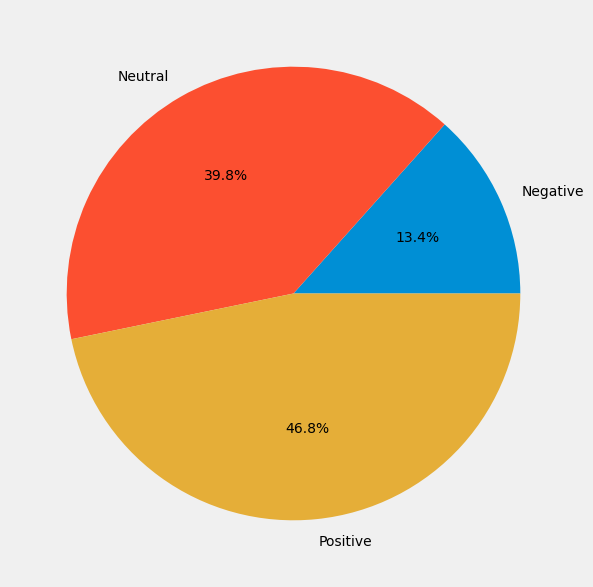

In [148]:
#page
sentiment_counts = df_page.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative     6525
Neutral     28339
Positive    73679
dtype: int64


<AxesSubplot:>

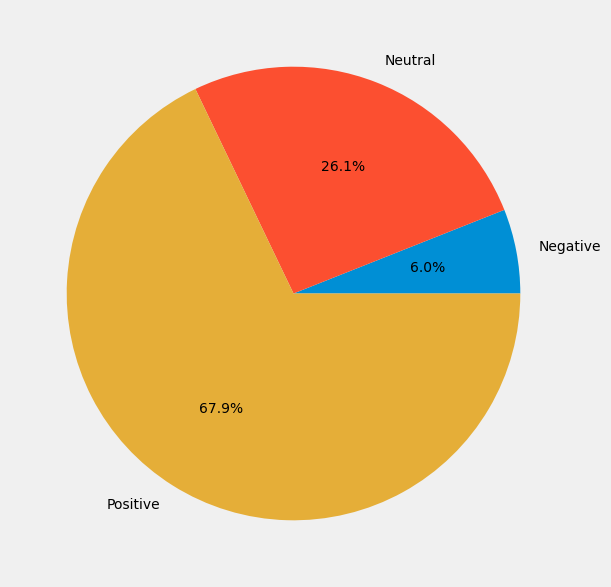

In [149]:
#web
sentiment_counts = df_web.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative     7090
Neutral     29847
Positive    26378
dtype: int64


<AxesSubplot:>

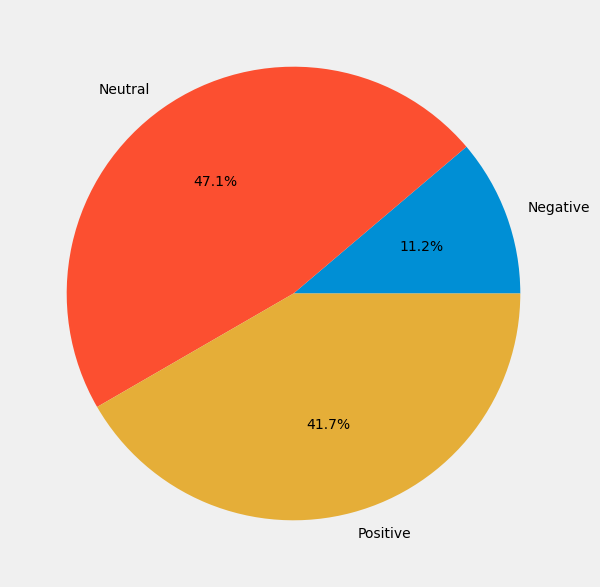

In [152]:
#domain
sentiment_counts = df_domain.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative    2992
Neutral     4123
Positive    8161
dtype: int64


<AxesSubplot:>

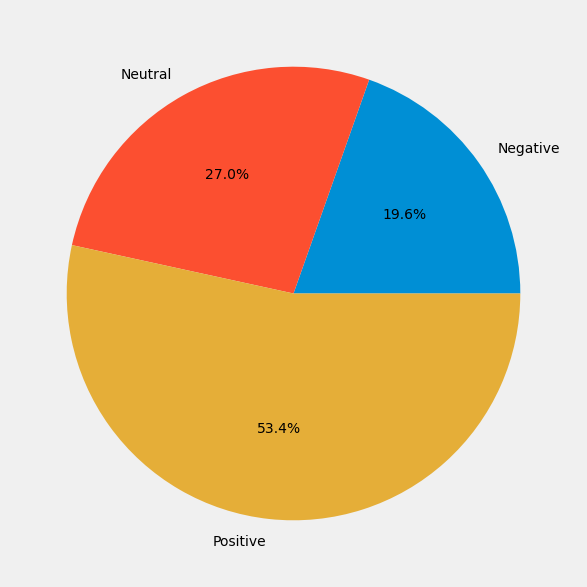

In [153]:
#email
sentiment_counts = df_email.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative    1241
Neutral     7151
Positive    5550
dtype: int64


<AxesSubplot:>

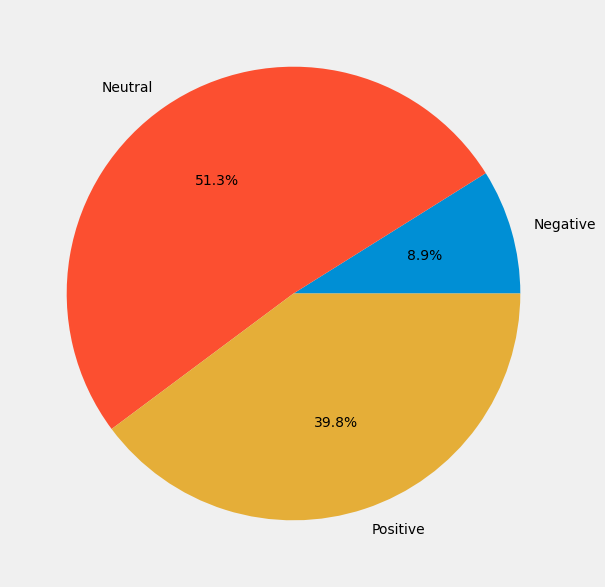

In [154]:
#wordpress
sentiment_counts = df_wordpress.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative    3248
Neutral     2911
Positive    6194
dtype: int64


<AxesSubplot:>

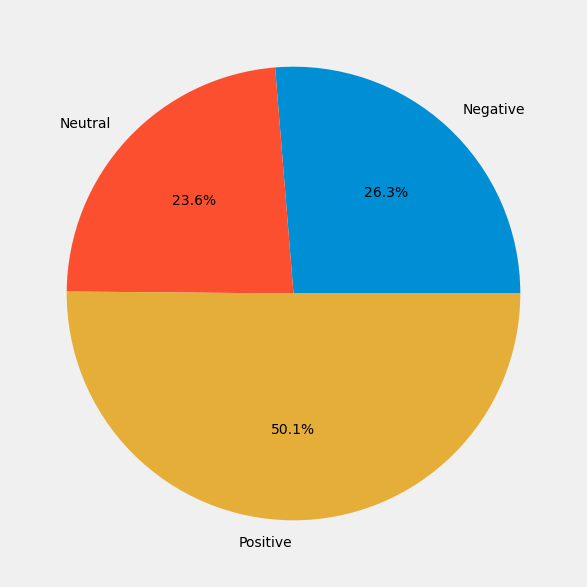

In [156]:
#support
sentiment_counts = df_support.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative     7942
Neutral     25164
Positive    75704
dtype: int64


<AxesSubplot:>

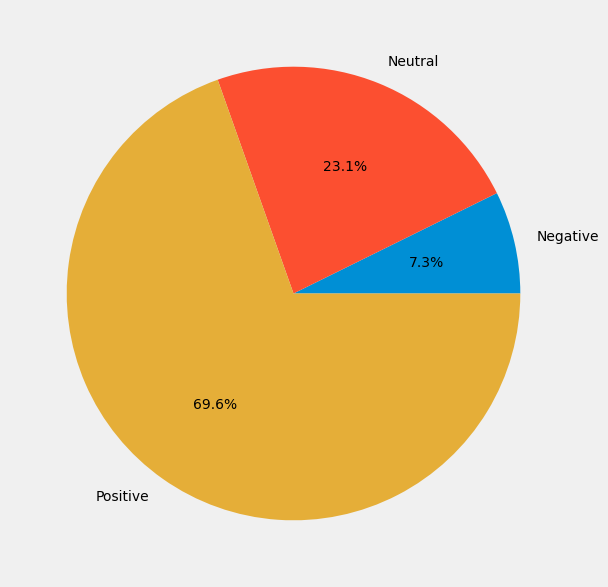

In [157]:
#site
sentiment_counts = df_site.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative    4181
Neutral     4545
Positive    7520
dtype: int64


<AxesSubplot:>

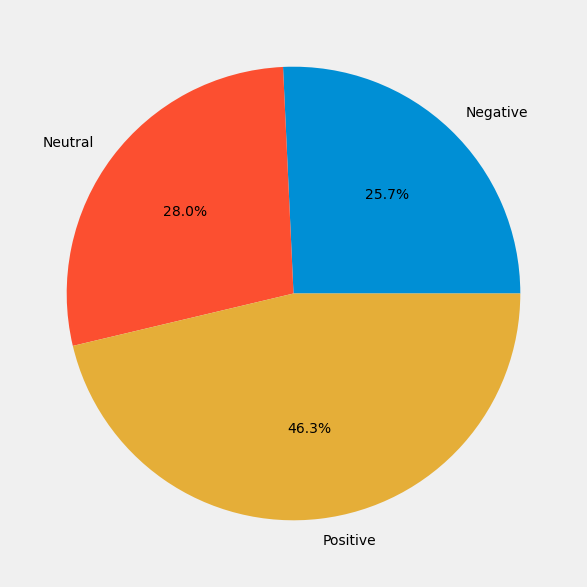

In [158]:
#service
sentiment_counts = df_service.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative      62
Neutral      170
Positive    3355
dtype: int64


<AxesSubplot:>

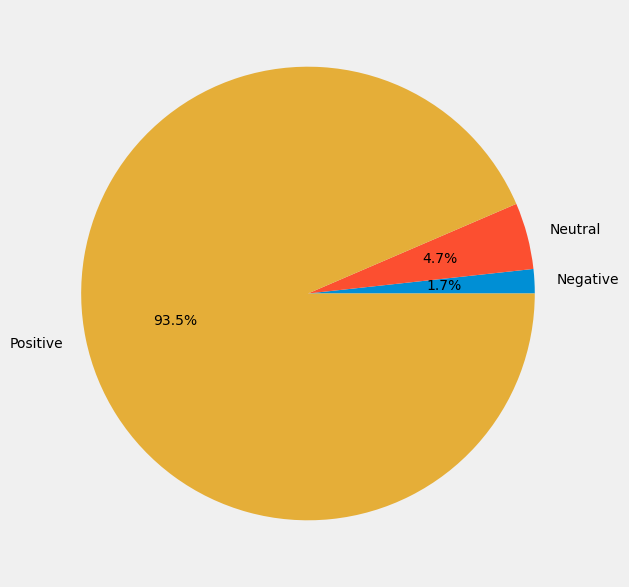

In [159]:
#subscribe
sentiment_counts = df_subscribe.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

In [163]:
df.columns

Index(['user', 'date', 'Tweets', 'user_location', 'tweets', 'Subjectivity',
       'Polarity', 'Status', 'builder', 'website', 'hosting', 'software',
       'security', 'page', 'web', 'domain', 'email', 'wordpress', 'support',
       'site', 'service', 'subscribe'],
      dtype='object')